In [91]:
%matplotlib inline
import os
import re

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [69]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [70]:
analysis = scripts.Analysis()

In [71]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250_min_1e-20_max_1.899e-19_ng_4_dlogN_0.426_0.426_0.426__P_1_T_250_ng_3',
                          'wgt_1_.9_.85_.7_.6_.5_.4',
                          'midlatitude_summer__dv_.005')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [72]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250_min_1e-20_max_1.899e-19_ng_4_dlogN_0.426_0.426_0.426__P_1_T_250_ng_3',
                          'wgt_1_.9_.85_.7_.6_.5_.4',
                          'midlatitude_summer__dv_.005')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [73]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 200)

In [74]:
fig2 = analysis.fig_fluxcoolr('fig2',
                              ggroups=list(range(1, 7 + 1)),
                              vartypes=['cooling rate'])
fig2.vars_plot['cooling rate'] = ['coolrg']
fig2.colors['flug'] = 'darkred'
fig2.colors['fnetg'] = 'lightcoral'
fig2.colors['coolrg'] = 'blue'
fig2.varlims_from_indexrange['linear'] = (50, 1050)
fig2.varlims_from_indexrange['log'] = (1e-4, 200)

In [75]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = np.sort(
    xr.concat(
        [crd.data['flux'].coords['pressure'].isel(pressure=[0, -1]),
         crd.data['flux'].coords['pressure'].sel(pressure=300, 
                                                 method='nearest')],
        dim='pressure'))

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [76]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])
        
table_flux.at_pressures = np.sort(
    xr.concat(
        [crd.data['flux'].coords['pressure'].isel(pressure=[0, -1]),
         crd.data['flux'].coords['pressure'].sel(pressure=300, 
                                                 method='nearest')],
        dim='pressure'))

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [77]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [34]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 980

nband = 120

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 50.

temperature_reference_low = 250.

ighigh = 4

ngas = 6      

ng = 7

data absth(:, 1)
!     &    /2.000000e-22, 3.8470878e-22, 7.40004238e-22,
!     &     1.423430e-21, 1.10733E-20,   2.93308E-19,
!     &     2.31589E-17/

data absth(:, 2)
     &    /1.000e-20,  2.668e-20,  7.117e-20,
     &     1.899e-19,   2.633e-19,   3.652e-19,
     &     5.065e-19/

data wgt
     &     /  1.00, 0.90, 0.85,
     &     0.70, 0.60, 0.50, 0.40/

include 'mls75.pro'


In [35]:
fig.display_hrefanchor()

In [49]:
fig2.display_hrefanchor()

In [37]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [38]:
table_dgdgs.display_hrefanchor()

In [62]:
s_abscom = 'Overall absth'
display.display(display.HTML(climahtml.getHTML_hrefanchor(s_abscom)))

In [40]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

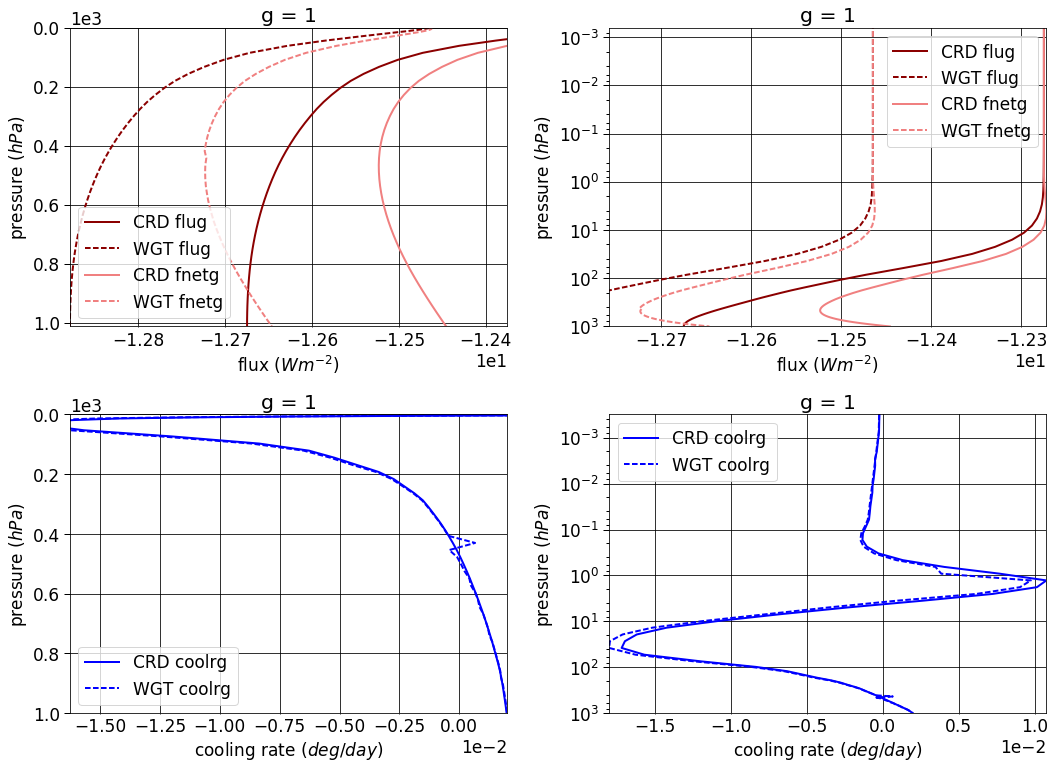

# Figure: flux, cooling rate g-group 2

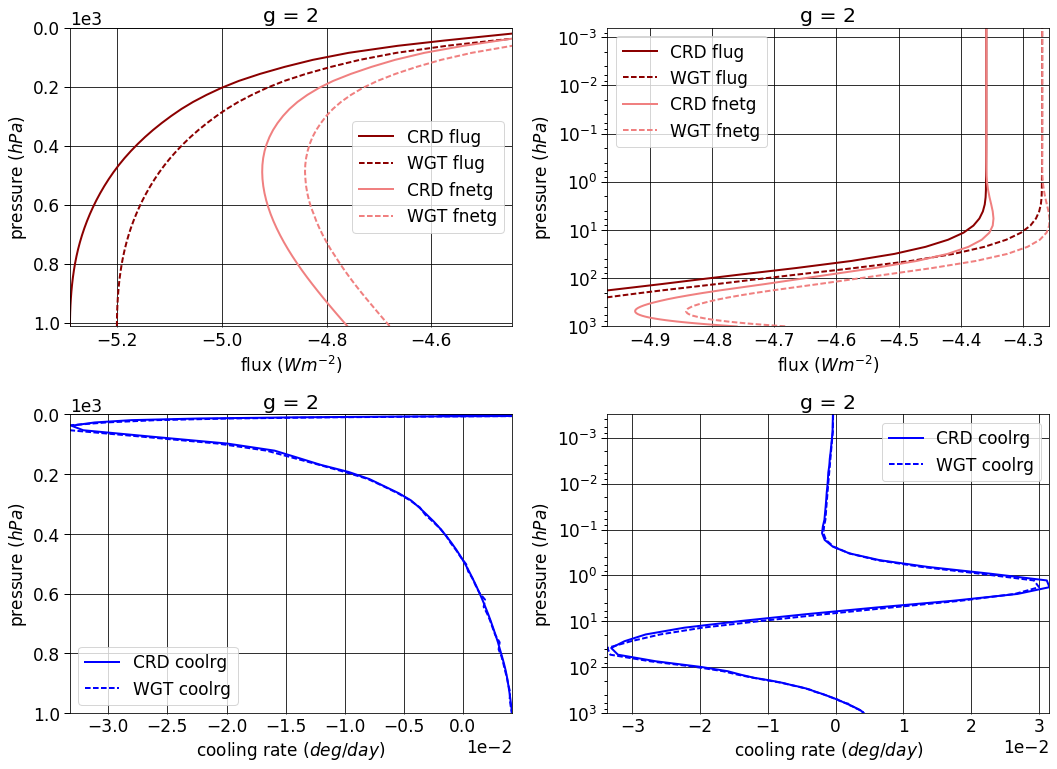

# Figure: flux, cooling rate g-group 3

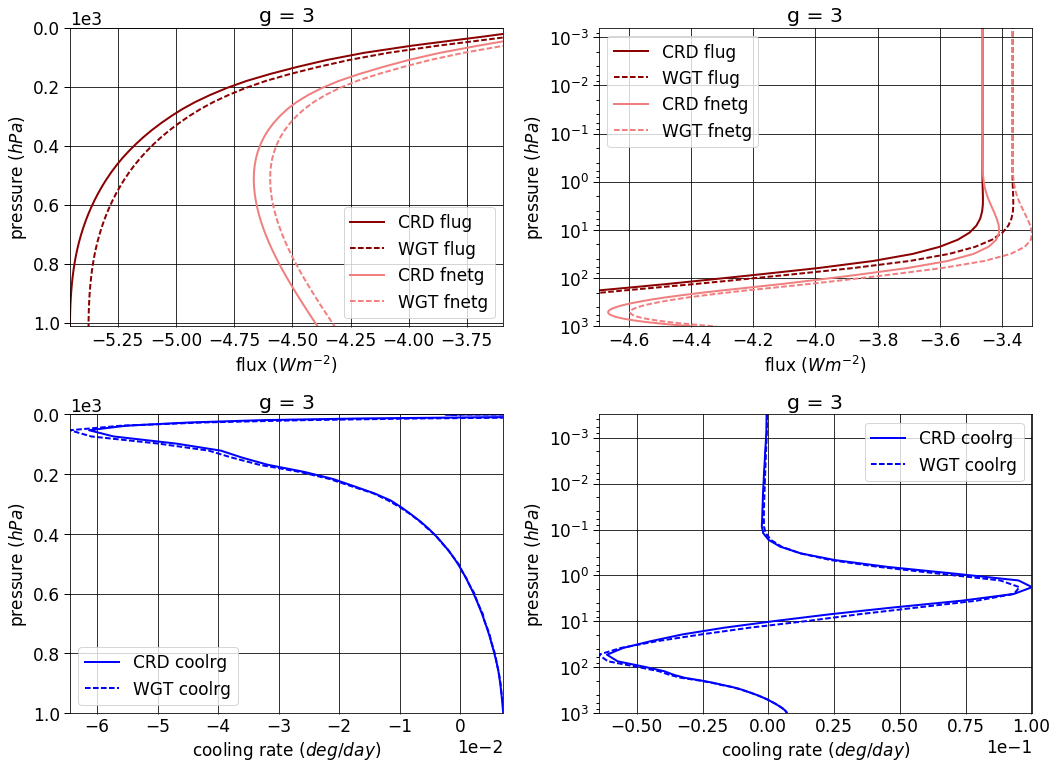

# Figure: flux, cooling rate g-group 4

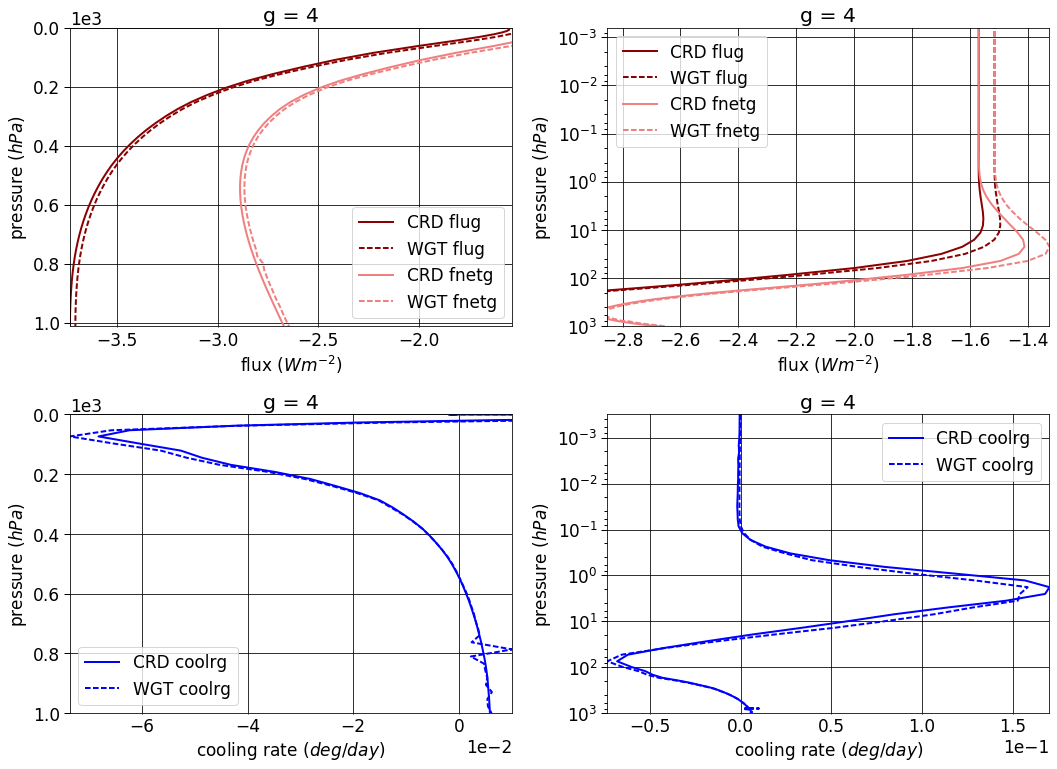

# Figure: flux, cooling rate g-group 5

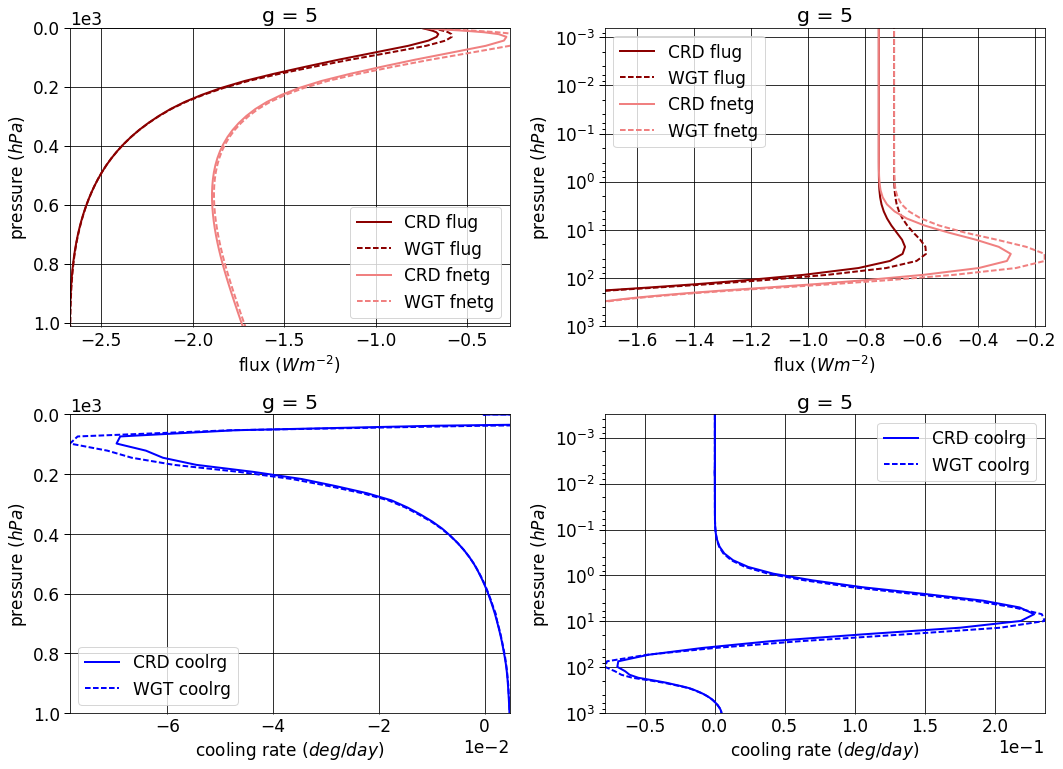

# Figure: flux, cooling rate g-group 6

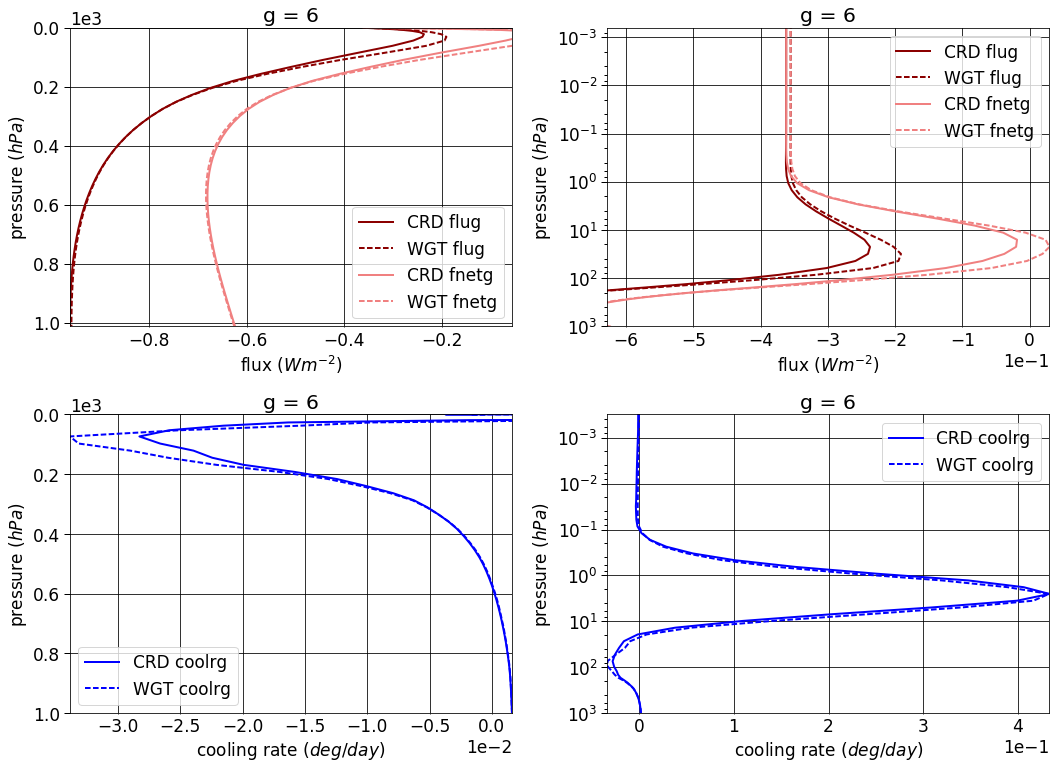

# Figure: flux, cooling rate g-group 7

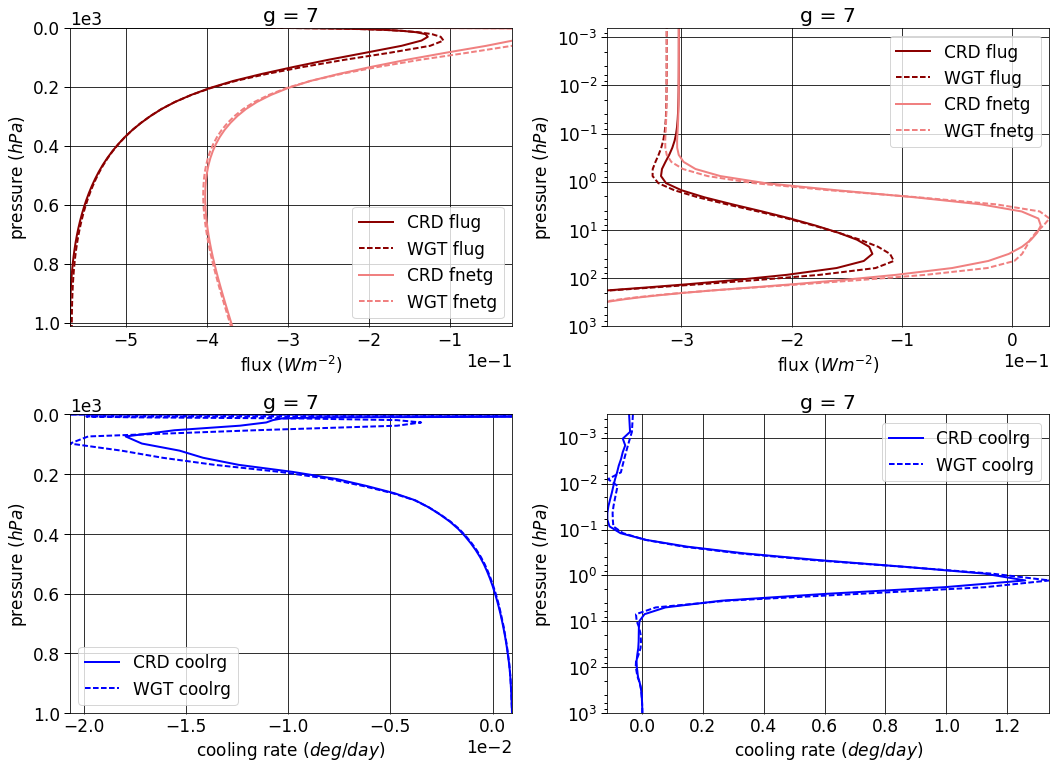

# Figure: flux, cooling rate g-group total

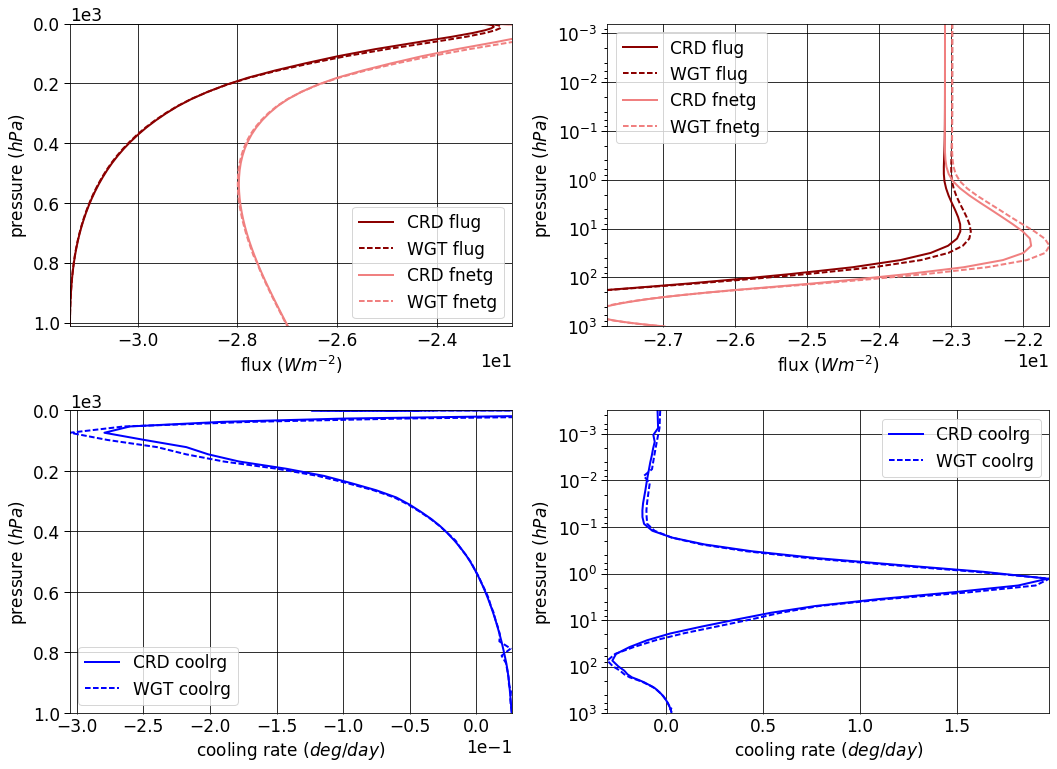

In [54]:
matplotlib.rcParams.update({'font.size': 17,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


# Figure: cooling rate g-group 1

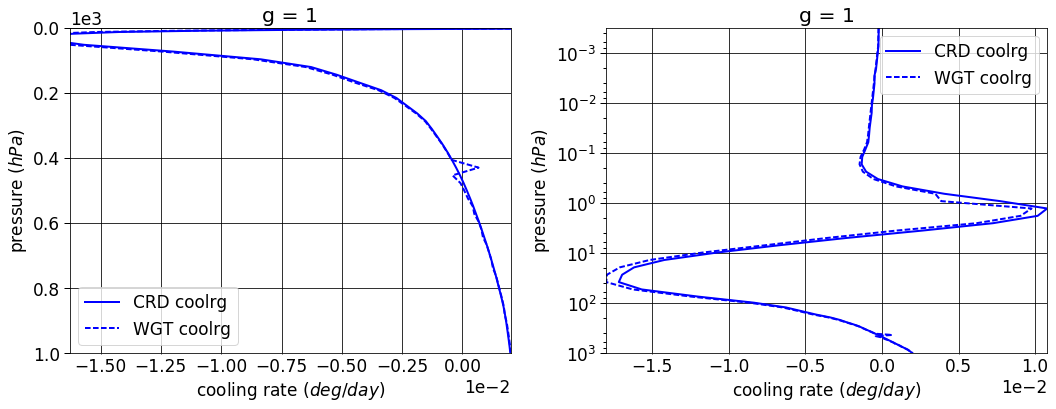

# Figure: cooling rate g-group 2

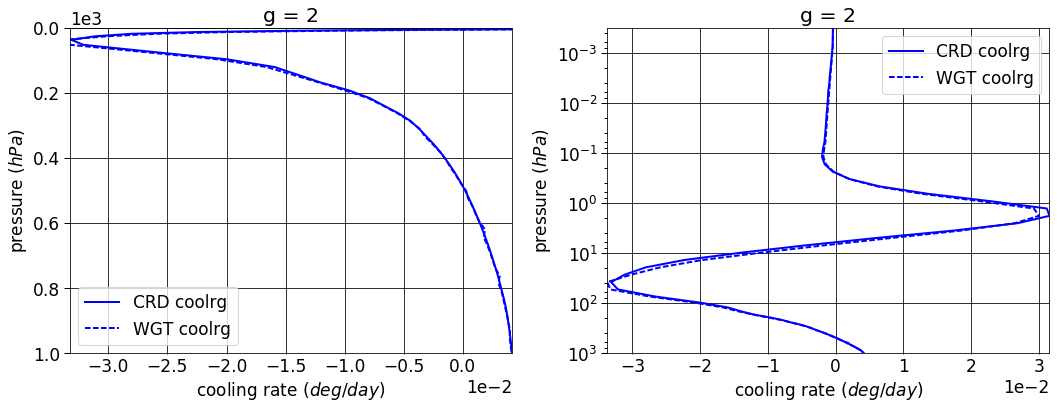

# Figure: cooling rate g-group 3

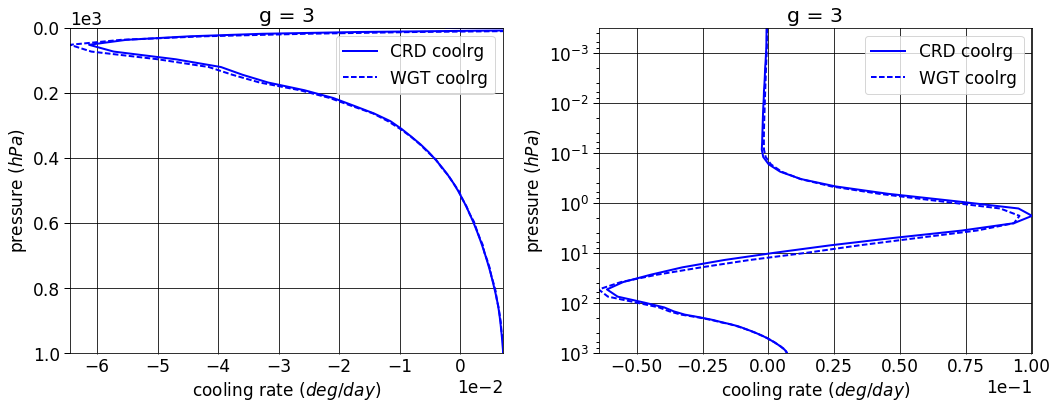

# Figure: cooling rate g-group 4

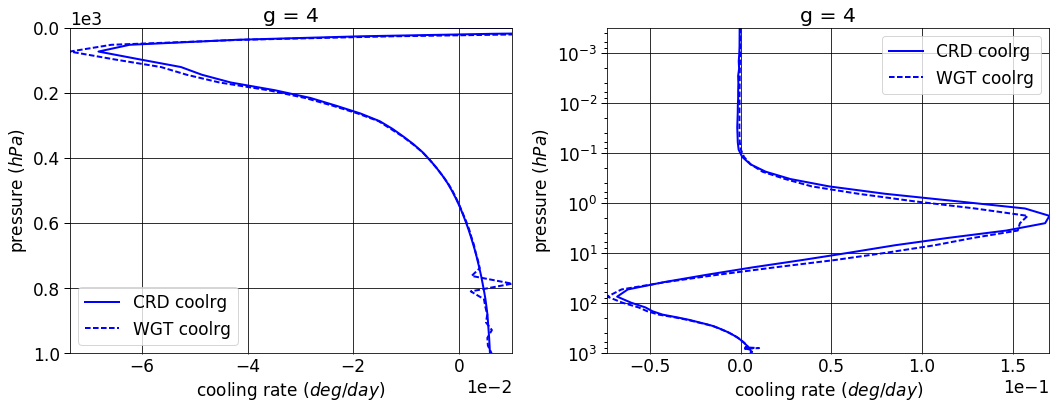

# Figure: cooling rate g-group 5

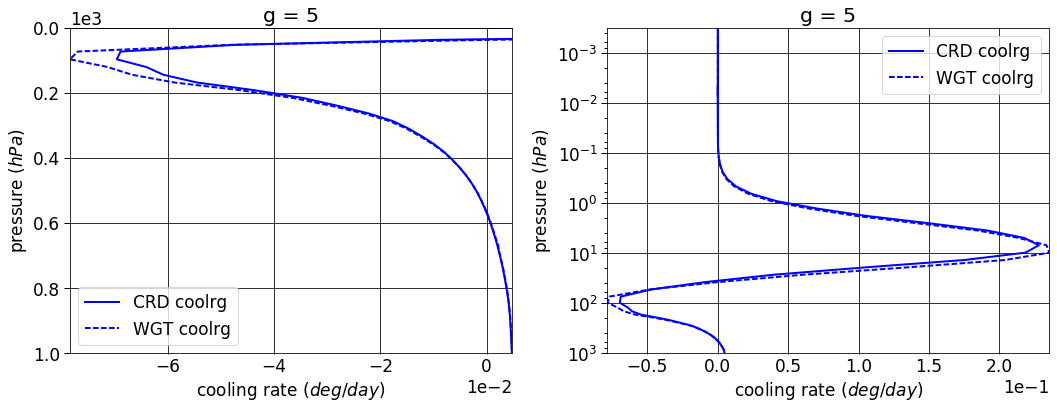

# Figure: cooling rate g-group 6

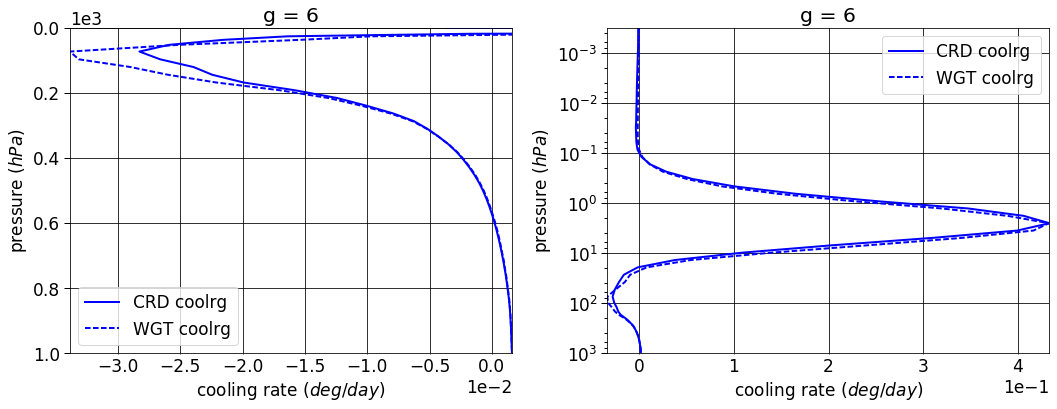

# Figure: cooling rate g-group 7

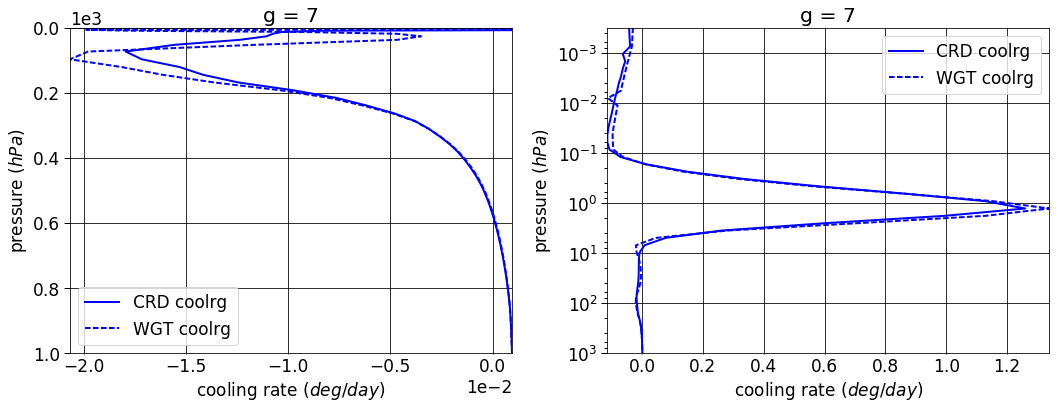

# Figure: cooling rate g-group total

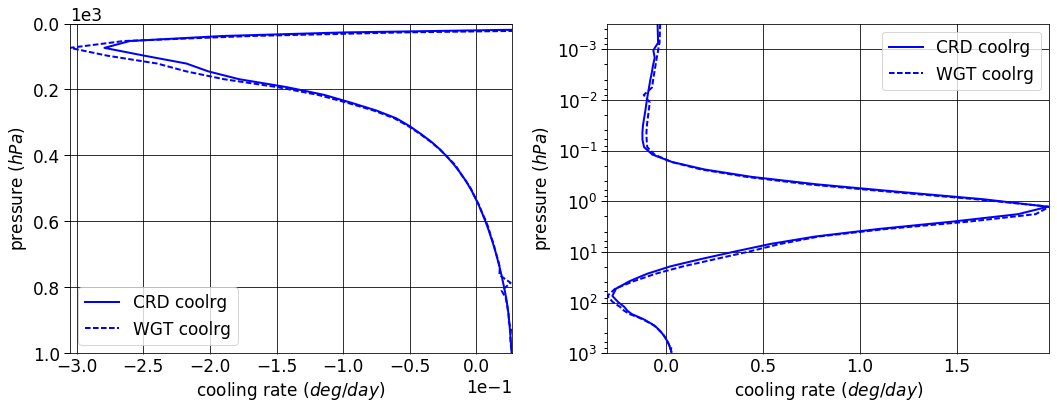

In [55]:
matplotlib.rcParams.update({'font.size': 17,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 
fig2.plot(analysis)

In [56]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.00     1     -12.274527  0.000000 -12.274527
  299.75   46    -12.601770  0.091319 -12.510451
  1013.00  76    -12.674908  0.229195 -12.445712
2 0.00     1      -4.358967  0.000000  -4.358967
  299.75   46     -5.097107  0.213612  -4.883495
  1013.00  76     -5.290591  0.530449  -4.760142
3 0.00     1      -3.463169  0.000000  -3.463169
  299.75   46     -5.019691  0.466393  -4.553298
  1013.00  76     -5.455917  1.064528  -4.391390
4 0.00     1      -1.569582  0.000000  -1.569582
  299.75   46     -3.254870  0.522255  -2.732616
  1013.00  76     -3.731833  1.061202  -2.670631
5 0.00     1      -0.750715  0.000000  -0.750715
  299.75   46     -2.184699  0.478152  -1.706547
  1013.00  76     -2.669752  0.943508  -1.726244
6 0.00     1      -0.361985  0.000000  -0.361985
  299.75   46     -0.795074  0.181104  -0.613970
  1013.00  76     -0.961969  0.338040  -0.623929
7 0.00     1      -0.302401  0.000000  -0.302401
  299.75   46     -0.469564  0.107371  -0.362193
  1013.00  76     -0.569265  0.200757  -0.368507


WGT


flug      fldg      fnetg
g pressure level                                
1 0.00     1     -12.464636  0.000000 -12.464636
  299.75   46    -12.805164  0.093581 -12.711583
  1013.00  76    -12.878752  0.232341 -12.646411
2 0.00     1      -4.269253  0.000000  -4.269253
  299.75   46     -5.010572  0.209759  -4.800813
  1013.00  76     -5.200884  0.521616  -4.679267
3 0.00     1      -3.366613  0.000000  -3.366613
  299.75   46     -4.942481  0.460852  -4.481629
  1013.00  76     -5.375945  1.057806  -4.318139
4 0.00     1      -1.515103  0.000000  -1.515103
  299.75   46     -3.231508  0.521635  -2.709873
  1013.00  76     -3.705025  1.059700  -2.645325
5 0.00     1      -0.697117  0.000000  -0.697117
  299.75   46     -2.182231  0.489173  -1.693057
  1013.00  76     -2.667723  0.955369  -1.712353
6 0.00     1      -0.355356  0.000000  -0.355356
  299.75   46     -0.795060  0.176899  -0.618160
  1013.00  76     -0.958917  0.333362  -0.625555
7 0.00     1      -0.313360  0.000000  -0.313360
  299.75   46     -0.469800  0.104021  -0.365779
  1013.00  76     -0.566989  0.196759  -0.370230


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.00     1     -0.190109  0.000000 -0.190109
  299.75   46    -0.203394  0.002261 -0.201132
  1013.00  76    -0.203844  0.003146 -0.200699
2 0.00     1      0.089714  0.000000  0.089714
  299.75   46     0.086535 -0.003853  0.082682
  1013.00  76     0.089707 -0.008833  0.080874
3 0.00     1      0.096556  0.000000  0.096556
  299.75   46     0.077209 -0.005541  0.071669
  1013.00  76     0.079973 -0.006722  0.073251
4 0.00     1      0.054479  0.000000  0.054479
  299.75   46     0.023362 -0.000619  0.022743
  1013.00  76     0.026808 -0.001502  0.025306
5 0.00     1      0.053598  0.000000  0.053598
  299.75   46     0.002469  0.011021  0.013490
  1013.00  76     0.002029  0.011862  0.013891
6 0.00     1      0.006629  0.000000  0.006629
  299.75   46     0.000015 -0.004205 -0.004190
  1013.00  76     0.003052 -0.004678 -0.001626
7 0.00     1     -0.010959  0.000000 -0.010959
  299.75   46    -0.000236 -0.003350 -0.003586
  1013.00  76     0.002276 -0.003998 -0.001723

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000213
  1001.112500 75     0.001983
2 0.000312    1     -0.000410
  1001.112500 75     0.004173
3 0.000312    1     -0.000641
  1001.112500 75     0.007119
4 0.000312    1     -0.000639
  1001.112500 75     0.005885
5 0.000312    1     -0.000010
  1001.112500 75     0.004727
6 0.000312    1     -0.001217
  1001.112500 75     0.001606
7 0.000312    1     -0.042512
  1001.112500 75     0.000955


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000228
  1001.112500 75     0.002008
2 0.000312    1     -0.000380
  1001.112500 75     0.004150
3 0.000312    1     -0.000479
  1001.112500 75     0.007096
4 0.000312    1     -0.000310
  1001.112500 75     0.006191
5 0.000312    1     -0.000003
  1001.112500 75     0.004770
6 0.000312    1     -0.000512
  1001.112500 75     0.001616
7 0.000312    1     -0.029996
  1001.112500 75     0.000957


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000015
  1001.112500 75     0.000025
2 0.000312    1      0.000031
  1001.112500 75    -0.000023
3 0.000312    1      0.000163
  1001.112500 75    -0.000023
4 0.000312    1      0.000328
  1001.112500 75     0.000306
5 0.000312    1      0.000007
  1001.112500 75     0.000043
6 0.000312    1      0.000706
  1001.112500 75     0.000010
7 0.000312    1      0.012516
  1001.112500 75     0.000002

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.00,1,-23.081346,0.000000,-23.081346
299.75,46,-29.422774,2.060206,-27.362569
1013.00,76,-31.354235,4.367680,-26.986555



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.00,1,-22.981437,0.000000,-22.981437
299.75,46,-29.436815,2.055920,-27.380894
1013.00,76,-31.354235,4.356953,-26.997281



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.00,1,9.990884e-02,0.000000,0.099909
299.75,46,-1.404031e-02,-0.004285,-0.018325
1013.00,76,4.100000e-07,-0.010726,-0.010726


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045643
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.031907
1001.112500,75,0.026788



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.013735
1001.112500,75,0.000340


In [57]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.165875,0.169859
3,0.171458,0.174865
4,0.118167,0.119209
5,0.085083,0.085039
6,0.030583,0.030673
7,0.018083,0.018159


In [60]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.000000e-20
2,2.668000e-20
3,7.117000e-20
4,1.899000e-19
5,7.154854e-20
6,1.287241e-18


In [7]:
# for importing results calcaulted 
# using the old stable version of CLIRAD
import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.clirad.sw.wrangle as cliradwrangle
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle

In [122]:
def path_clirad_result():
    path = os.path.join('/lfs1/home/jackyu/radiation/clirad',
                        'examples/longwave/o3/midlatitude_summer',
                        'OUTPUT_CLIRAD.dat')
    return path



def load_clirad_coolr(fpath):
    pnl_clirad = cliradwrangle.\
    OUTPUT_CLIRAD_to_PandasPanel(readfrom=fpath,
                                 cooling_rate=True,
                                 signed_fluxes=True)
    da = xr.DataArray(pnl_clirad)
    da = da.rename({'dim_0': 'band', 
                'dim_1': 'level',
                'dim_2': 'var'})
    
    coolr = da.sel(band=5, var='cooling_rate').values[1:]
    levelp = da.sel(band=5, var='pressure').values
    layerp = .5 * (levelp[1:] + levelp[:-1])
    
    da_coolr = xr.DataArray(coolr,
                     dims=['pressure'],
                     coords={'layer': ('pressure',
                                       range(1, da.coords['level'].shape[0] - 1 + 1)),
                             'pressure': layerp})
    
    return da_coolr

In [127]:
def plt_clirad(das):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
    
    axs = axs.flatten()
    
    yscales = ['linear', 'log']
    varlims = [(50, 1050), (1e-4, 200)]
    
    modelnames = ['CRD', 'WGT', 'CLIRAD']
    colors = ['b', 'b', 'g']
    linestyles = ['-', '--', '--']
    
    for ax, yscale, varlim in zip(axs, yscales, varlims):
        for modelname, da_coolr, color, linestyle in zip(modelnames, 
                                                         das, colors, linestyles):
            da_coolr.climaviz\
            .plot(ax=ax,
                  linewidth=2, grid=True,
                  label=modelname,
                  color=color,
                  linestyle=linestyle,
                  index_on_yaxis=True,
                  yincrease=False, 
                  yscale=yscale,
                  varlim_from_indexrange=varlim)
            
        ax.set_xlabel('cooling rate $(deg/day)$')
        ax.set_ylabel('pressure $(hPa)$')
    
    return fig, axs

(<matplotlib.figure.Figure at 0x2b02ac22f080>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b02ac22fc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2b02ac273128>], dtype=object))

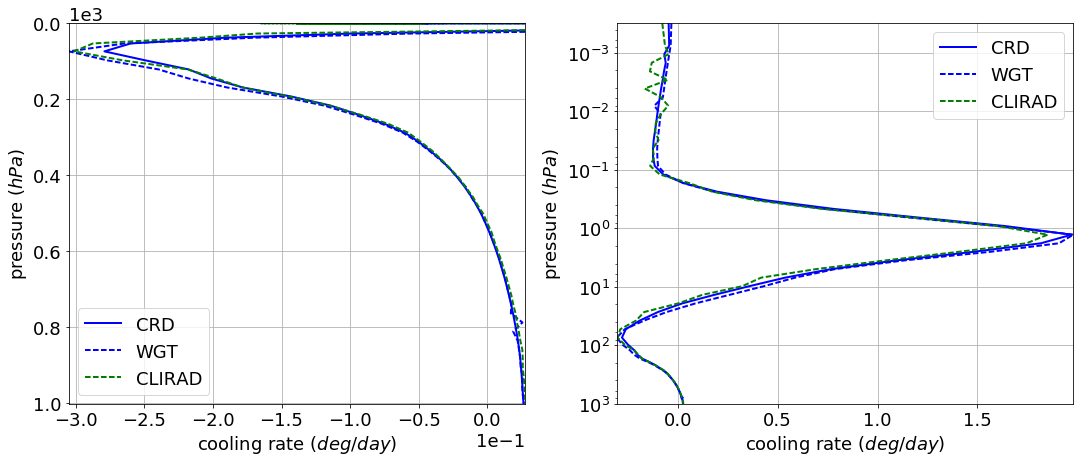

In [128]:
matplotlib.rcParams.update({'font.size': 18})

das = [crd.data['cooling rate']['coolrg'].sum('g'),
       crdx_wgt.data['cooling rate']['coolrg'].sum('g'),
       coolr_clirad]


plt_clirad(das)

In [130]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')